In [77]:
from PIL import Image, ImageDraw
from IPython.display import display


# STEP 1: DRAW BOXES

# Set the size of the crossword grid
grid_size = 15  # Adjust this to the desired size (e.g., 9x9)

# Set the size of each square in pixels
square_size = 60  # Adjust this to the desired square size

# Calculate the total image size
image_size = grid_size * square_size + 2




In [ ]:


for i in range(1000):
    import numpy as np
    rows, cols = 15, 15
    matrix = np.zeros((rows, cols), dtype=int)
    matrix
    
    # 4 random across 6x1
    loops = 4
    while loops > 0:
        row = np.random.choice(range(15))
        column = np.random.choice(range(15-6))
        redo = False
        for i in range(6):
            try:
                if matrix[row+1][column+i] == 1:
                    redo = True
            except:
                pass
            try:
                 if matrix[row-1][column+i] == 1:
                    redo = True
            except:
                pass
        for i in range(8):
            try:
                 if matrix[row][column+i-1] == 1:
                    redo = True
            except:
                pass
        if redo:
            continue
        for i in range(6):
            matrix[row][column+i] = 1
        loops -= 1

    # 4 random across 5x1
    loops = 4
    while loops > 0:
        row = np.random.choice(range(15))
        column = np.random.choice(range(15-6))
        redo = False
        for i in range(5):
            try:
                if matrix[row+1][column+i] == 1:
                    redo = True
            except:
                pass
            try:
                 if matrix[row-1][column+i] == 1:
                    redo = True
            except:
                pass
        for i in range(7):
            try:
                 if matrix[row][column+i-1] == 1:
                    redo = True
            except:
                pass
        if redo:
            continue
        for i in range(5):
            matrix[row][column+i] = 1
        loops -= 1

    # 6 random across 4x1
    size = 4
    loops = 3
    success = False
    for i in range(10000):
        row = np.random.choice(range(15))
        column = np.random.choice(range(15-6))
        redo = False
        for i in range(size):
            try:
                if matrix[row+1][column+i] == 1:
                    redo = True
            except:
                pass
            try:
                 if matrix[row-1][column+i] == 1:
                    redo = True
            except:
                pass
        for i in range(size+2):
            try:
                 if matrix[row][column+i-1] == 1:
                    redo = True
            except:
                pass
        if redo:
            continue
        for i in range(size):
            matrix[row][column+i] = 1
        loops -= 1

        if loops == 0:
            success = True
            break

    if success:
        print("success part 1")
    else:
        print("Retrying")
        continue
        
    # 6 random across 4x1
    size = 3
    loops = 5
    success = False
    for i in range(10000):
        row = np.random.choice(range(15))
        column = np.random.choice(range(15-6))
        redo = False
        for i in range(size):
            try:
                if matrix[row+1][column+i] == 1:
                    redo = True
            except:
                pass
            try:
                 if matrix[row-1][column+i] == 1:
                    redo = True
            except:
                pass
        for i in range(size+2):
            try:
                 if matrix[row][column+i-1] == 1:
                    redo = True
            except:
                pass
        if redo:
            continue
        for i in range(size):
            matrix[row][column+i] = 1
        loops -= 1

        if loops == 0:
            success = True
            break
            
    if success:
        print("success part 2")
        break
    else:
        print("Retrying")
        continue
    
matrix

success part 1
Retrying
success part 1
Retrying
success part 1
Retrying
success part 1


In [ ]:
for i in range(15):
    for j in range(15):
        if matrix[i][j] == 1:
            if i == 0 or matrix[i-1][j] == 0:
                choice = np.random.choice([True, False, True])
                if choice:
                    choice2 = np.random.choice([3,3,4,4,5,6])
                    found_issue = False
                    try:
                        if matrix[i][j-1] == 0 and matrix[i][j-2] == 1:
                            found_issue = True
                    except:
                        pass
                    try:
                        if matrix[i][j+1] == 0 and matrix[i][j+2] == 1:
                            found_issue = True
                    except:
                        pass
                    for iteration in range(1, choice2+1):
                        try:
                            if matrix[i+iteration][j-1] == 1 and matrix[i+iteration][j] == 0:
                                found_issue = True
                        except:
                            pass
                        try:
                            if matrix[i+iteration][j+1] == 1 and matrix[i+iteration][j] == 0:
                                found_issue = True
                        except:
                            pass
                    if not found_issue and i + choice2 <= 15:
                        for iteration in range(choice2):
                            matrix[i+iteration][j] = 1
matrix

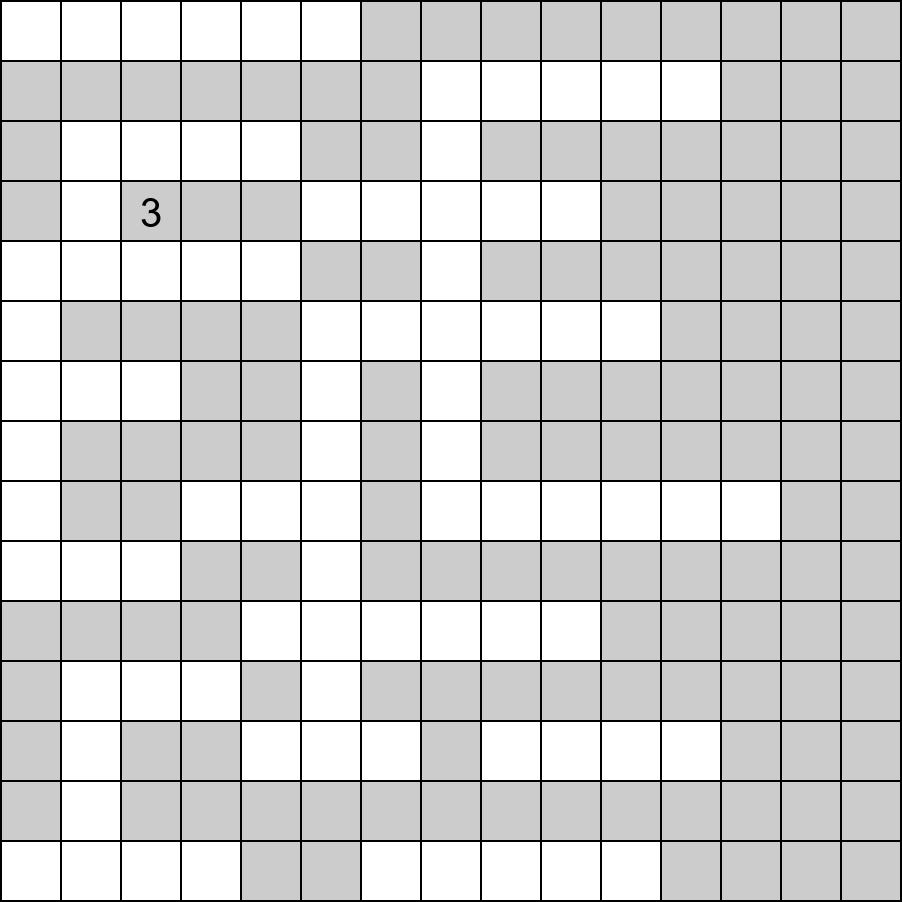

In [99]:
# Calculate the total image size
image_size = grid_size * square_size + 2

# Create a blank image with a white background
image = Image.new("RGB", (image_size, image_size), "white")

# Create a drawing object to draw on the image
draw = ImageDraw.Draw(image)

# Define colors for 0 and 1 (you can change these to any colors you prefer)
color_0 = "white"
color_1 = "#CCCCCC"

# Draw the grid and fill squares based on the matrix
for i in range(grid_size):
    for j in range(grid_size):
        x0, y0 = j * square_size, i * square_size
        x1, y1 = x0 + square_size, y0 + square_size

        # Draw the grid lines
        draw.rectangle([x0, y0, x1, y1], outline="black")

        # Fill the square based on the matrix value
        if matrix[i][j] == 0:
            draw.rectangle([x0, y0, x1, y1], fill=color_1)
        else:
            draw.rectangle([x0, y0, x1, y1], fill=color_0)

# Create a blank image with a white background
# image = Image.new("RGB", (image_size, image_size), "white")

# Create a drawing object to draw on the image
draw = ImageDraw.Draw(image)

# Draw the grid lines with an extra pixel on the right and bottom to cover the white borders
for i in range(0, image_size + 1, square_size):
    line_start = (i, 0)
    line_end = (i, image_size)
    draw.line([line_start, line_end], fill="black", width=2)

    line_start = (0, i)
    line_end = (image_size, i)
    draw.line([line_start, line_end], fill="black", width=2)

    
    
from PIL import Image, ImageDraw
from IPython.display import display
            
            
            
# STEP 3: DRAW A 3
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display



# Define the font and size for the "3"
font = ImageFont.load_default()
font_size = 40  # Adjust the size as needed
font = ImageFont.truetype("arial.ttf", font_size)  # You may need to provide the path to your font file

# Specify the position for the "3"
row = 4 - 1  # Convert to 0-based index
column = 3 - 1  # Convert to 0-based index
x, y = column * square_size, row * square_size

# Draw the number "3" at the specified location
number_to_draw = "3"
draw.text((x+20, y+10), number_to_draw, fill="black", font=font, )

# Display the grid with "3" in the 3rd column and 4th row
display(image)
           